<a href="https://colab.research.google.com/github/pshemach/Computer-Vision/blob/main/Transfer_Learning_Fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print('Hello World,')

Hello World,


In [5]:
import os
import matplotlib.pyplot as plt
import zipfile

import tensorflow as tf
import numpy as np

In [11]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2024-02-27 03:35:55--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.152.207, 142.250.128.207, 142.251.6.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.152.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  56.7MB/s    in 1.2s    

2024-02-27 03:35:56 (56.7 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [12]:
zip_ref = zipfile.ZipFile('cats_and_dogs_filtered.zip','r')
zip_ref.extractall()
zip_ref.close()

In [18]:
for dirpath, dirname, filenames in os.walk('cats_and_dogs_filtered'):
  print(f'There are {len(dirname)} directories and {len(filenames)} images in {dirpath}')

There are 2 directories and 1 images in cats_and_dogs_filtered
There are 2 directories and 0 images in cats_and_dogs_filtered/validation
There are 0 directories and 500 images in cats_and_dogs_filtered/validation/cats
There are 0 directories and 500 images in cats_and_dogs_filtered/validation/dogs
There are 2 directories and 0 images in cats_and_dogs_filtered/train
There are 0 directories and 1000 images in cats_and_dogs_filtered/train/cats
There are 0 directories and 1000 images in cats_and_dogs_filtered/train/dogs


In [20]:
train_dir = 'cats_and_dogs_filtered/train'
validation_dir = 'cats_and_dogs_filtered/validation'

In [23]:
BATCH_SIZE = 32
IMAGE_SIZE = (160,160)

In [24]:
train_data = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                         shuffle=True,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE)

validation_data = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                              shuffle=True,
                                                              batch_size=BATCH_SIZE,
                                                              image_size=IMAGE_SIZE)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [26]:
class_names = train_data.class_names

In [28]:
len(train_data), len(validation_data)

(63, 32)

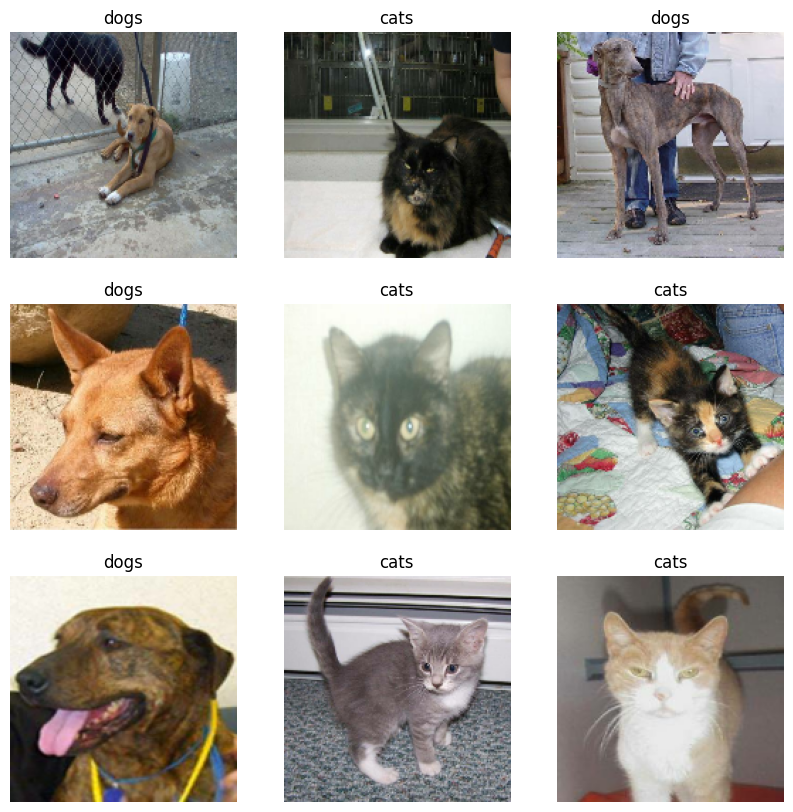

In [38]:
plt.figure(figsize=(10,10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3,3, i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [45]:
val_batches = tf.data.experimental.cardinality(validation_data)
test_data = validation_data.take(val_batches//5)
validation_data = validation_data.skip(val_batches//5)

In [47]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_data))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_data))

Number of validation batches: 26
Number of test batches: 6


In [50]:
AUTOTUNE = tf.data.AUTOTUNE

train_data = train_data.prefetch(buffer_size=AUTOTUNE)
test_data = test_data.prefetch(buffer_size=AUTOTUNE)
validation_data = validation_data.prefetch(buffer_size=AUTOTUNE)

In [51]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2)
])

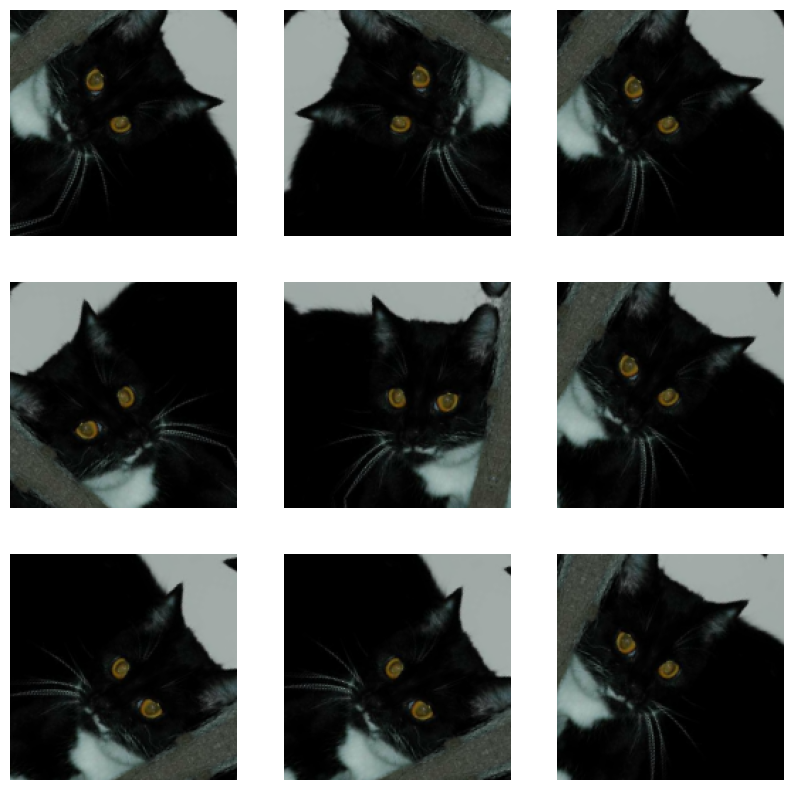

In [62]:
plt.figure(figsize=(10,10))
for images, _ in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3,3, i+1)
    augmented_image = data_augmentation(tf.expand_dims(images[0], 0))
    plt.imshow(augmented_image[0]/255)
    plt.axis("off")